# Read H5 file

Read hdf5 file produced by CheckForSpectraction notebook

work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/03/31
- last update : 2023/04/01

In [2]:
import h5py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

In [4]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from astropy.time import Time
import astropy.units as u

In [6]:
DateToRuncollection = {
 20230228 :  "u/dagoret/BPS_manyspectro_v70",
 20230301 :  "u/dagoret/BPS_manyspectro_v71", 
 20230302 :  "u/dagoret/BPS_manyspectro_v72", 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", 
 20230316 :  "u/dagoret/BPS_manyspectro_v74", 
}

In [7]:
#DATE="20230228" # with "u/dagoret/BPS_manyspectro_v70 in "u/dagoret/BPS_manyspectro_v70"
#DATE="20230301" # with "u/dagoret/BPS_manyspectro_v70 in "u/dagoret/BPS_manyspectro_v71"
#DATE="20230302" # with "u/dagoret/BPS_manyspectro_v70 in "u/dagoret/BPS_manyspectro_v72"

#my_collection = "u/dagoret/BPS_manyspectro_v70" # data from february 28th 2023  rebin=2,
#my_collection = "u/dagoret/BPS_manyspectro_v71" # data from fMarch 1st 2023 rebin=2,
#my_collection = "u/dagoret/BPS_manyspectro_v72" # data from fMarch 2nd 2023 rebin=2,


DATE = 20230316
my_collection = DateToRuncollection[DATE]


filterdispersername = "empty~holo4_003"

In [8]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

In [9]:
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
input_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

In [11]:
hf =  h5py.File(input_file_h5, 'r') 
hf.keys()

<KeysViewHDF5 ['2023031600465', '2023031600466', '2023031600473', '2023031600474', '2023031600488', '2023031600489', '2023031600497', '2023031600498', '2023031600505', '2023031600506', '2023031600520', '2023031600521', '2023031600528', '2023031600529', '2023031600536', '2023031600537', '2023031600544', '2023031600545', '2023031600553', '2023031600554', '2023031600561', '2023031600562', '2023031600569', '2023031600570', '2023031600577', '2023031600578', '2023031600589', '2023031600590', '2023031600597', '2023031600598', '2023031600608', '2023031600609', '2023031600616', '2023031600617', '2023031600624', '2023031600625', '2023031600631', '2023031600645', '2023031600646', '2023031600653', '2023031600654', '2023031600662', '2023031600663', '2023031600670', '2023031600671', '2023031600681', '2023031600682', '2023031600689', '2023031600690', '2023031600697', '2023031600698', '2023031600705', '2023031600706', '2023031600713', '2023031600714', '2023031600722', '2023031600723', '2023031600730',

In [ ]:
key_sel = list(hf.keys())[0]
print(key_sel)

In [12]:
group = hf.get(keysel)

In [13]:
all_subgroup_keys = []
for k in group.attrs.keys():
    print('{} => {}'.format(k, group.attrs[k]))
    all_subgroup_keys.append(group.attrs[k])  

exposure => 2023031600465
index => 0
me_az_rms => 0.0155201695416632
me_el_rms => 0.0138804549914017
me_image_az_rms => 0.0135273921559124
me_image_el_rms => 0.0138804549914017
me_image_rot_rms => 0.0001408781444064
me_rot_rms => 0.1037792970015708
spec_airmass => 2.03400592655944
spec_camera_angle => -69.96210337292302
spec_date_obs => 2023-03-17T06:20:56.082001145Z
spec_dec => -87.4203577859495
spec_filter_label => empty
spec_header_a2_fit => 1.0
spec_header_airmass => 2.03400592655944
spec_header_am_fit => 2.03400592655944
spec_header_cam_rot => -69.96210337292302
spec_header_chi2_fit => 20.02835532299288
spec_header_d2ccd => 187.3135252490909
spec_header_date-obs => 2023-03-17T06:20:56.082001145Z
spec_header_dec => -87.4203577859495
spec_header_exptime => 30.0
spec_header_filter => empty
spec_header_grating => holo4_003
spec_header_ha => -107.9835870591755
spec_header_lbda_ref => 597.2571590735706
spec_header_lshift => 0.0
spec_header_meanfwhm => 6.733709376333841
spec_header_outhu

In [14]:
list(group.items())

[('spec_covmatrix',
  <HDF5 dataset "spec_covmatrix": shape (1136, 1136), type ">f8">),
 ('spec_data', <HDF5 dataset "spec_data": shape (1136,), type ">f8">),
 ('spec_data_next_order',
  <HDF5 dataset "spec_data_next_order": shape (1136,), type ">f8">),
 ('spec_err', <HDF5 dataset "spec_err": shape (1136,), type ">f8">),
 ('spec_err_next_order',
  <HDF5 dataset "spec_err_next_order": shape (1136,), type ">f8">),
 ('spec_lambdas', <HDF5 dataset "spec_lambdas": shape (1136,), type ">f8">),
 ('spec_spectrogram',
  <HDF5 dataset "spec_spectrogram": shape (185, 1136), type ">f8">),
 ('spec_spectrogram_bgd',
  <HDF5 dataset "spec_spectrogram_bgd": shape (185, 1136), type ">f8">),
 ('spec_spectrogram_bgd_rms',
  <HDF5 dataset "spec_spectrogram_bgd_rms": shape (185, 1136), type ">f8">),
 ('spec_spectrogram_err',
  <HDF5 dataset "spec_spectrogram_err": shape (185, 1136), type ">f8">),
 ('spec_spectrogram_fit',
  <HDF5 dataset "spec_spectrogram_fit": shape (51120,), type ">f8">),
 ('spec_spectro

In [15]:
targetname=group.attrs["spec_target_label"]
exposure = group.attrs["exposure"]
airmass = group.attrs["spec_airmass"]
lambdas = np.array(group.get("spec_lambdas"))
data =  np.array(group.get("spec_data"))
data_next_order=  np.array(group.get("spec_data_next_order"))
spectrogram =  np.array(group.get("spec_spectrogram"))

In [16]:
title = f"{targetname}, exposure = {exposure}, am={airmass:.2f}"

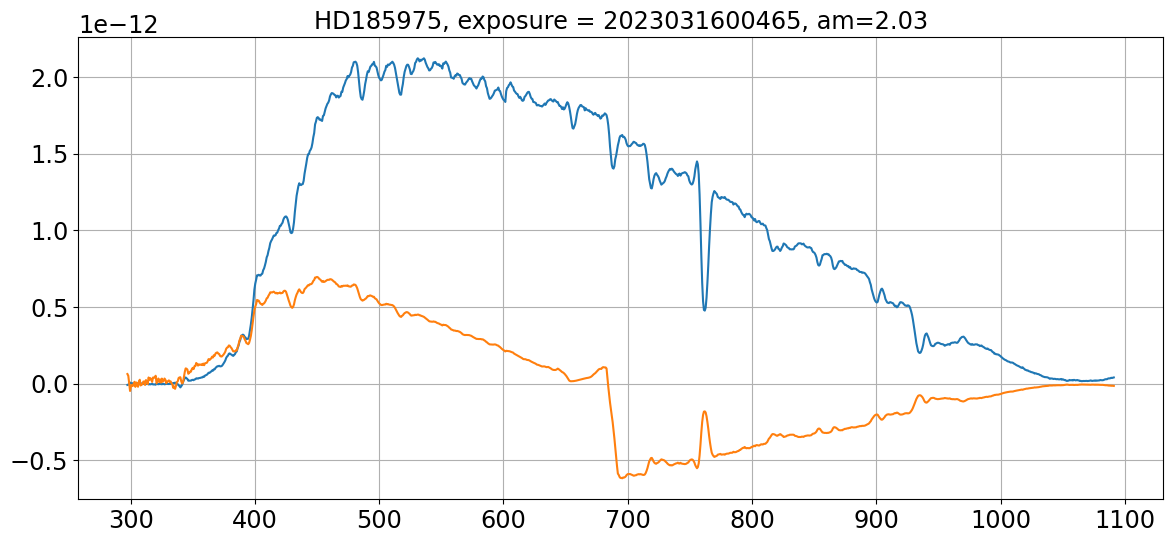

In [17]:
plt.plot(lambdas,data)
plt.plot(lambdas,data_next_order)
plt.title(title)
plt.grid()

In [18]:
spectrogram.shape

(185, 1136)

Text(0.5, 1.0, 'HD185975, exposure = 2023031600465, am=2.03')

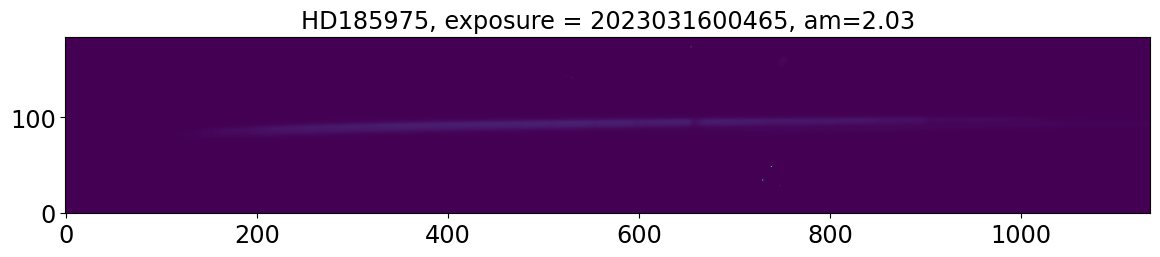

In [19]:
plt.imshow(spectrogram,origin="lower")
plt.title(title)

In [17]:
hf.close() 